In [ ]:
## !conda install imageio


In [1]:
import torch
import numpy as np
import os
import imageio

In [51]:
img_arr = imageio.imread ('data/bobby.jpg')
print ( img_arr.shape)

(976, 1334, 3)


make image into torch tensor, PyTorch wants images , channel x height x width


In [52]:
img = torch.from_numpy(img_arr)
print (img.shape)


## torch.Size([976, 1334, 3]) 0,1,2 gesen daraalalaar indexjuulne

torch.Size([976, 1334, 3])


In [4]:

out = img.permute (2,0,1)
print (out.shape)

## index iin daraalliig uurchluj bairshuulah 2,0,1 gesen daraallaar

torch.Size([3, 976, 1334])


## batch tensor

In [54]:
batch_size = 3

batch = torch.zeros (batch_size, 3, 256, 256, dtype = torch.uint8)
## (3 images, 3 channel means colored image, 256 - defining images size)

print (batch.shape)

torch.Size([3, 3, 256, 256])


In [55]:
data_dir = 'data/image-cats/'

filenames = [ name for name in os.listdir(data_dir) ]
## os.listdir(data_dir) give all file names by list

print (filenames)

['cat1.png', 'cat2.png', 'cat3.png', 'mod_cat.png']


In [62]:
for i , filename in enumerate (filenames): ## filenames -ees 1, 1 eer m unshij filename ruu hiine, i gesen index ruu unshij hiine
    img_arr = imageio.imread (os.path.join(data_dir,filename) ) ## zaasan zamaas, filename eer unshij img_arr d hiine
    
    print (img_arr.shape)
    img_t = torch.from_numpy (img_arr)
    img_t = img_t.permute (2,0,1)
    print (img_t.shape)
    img_t = img_t [:3] ## ehnii image iig slice hiine ???
    print (img_t.shape)
    batch [i] = img_t 
    

(256, 256, 3)
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
(256, 256, 3)
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
(256, 256, 3)
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
(256, 256, 3)
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])


IndexError: index 3 is out of bounds for dimension 0 with size 3

In [56]:
print ( batch[0] )

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)


## Normalization

standart devation  x_normalize = x_mean / standart_dev 

In [63]:
 ## zurgiin ungu bolgonii meaniig oloh. 
 
batch = batch.float() ## data type iin todorhoiloh

n_channels = batch.shape [1] ## index 1 is represent channels. 0 is batch number. torch.Size([3, 3!!!!!, 256, 256])
for c in range (n_channels):
    mean = torch.mean (batch [:,c] ) ## torch.mean -> means. 0 channel-> Reds of RGB. : slicing (skip batch number), c - d channel iin utgiig uguh
    standart_dev = torch.std (batch [:,c]) ## torch.std -> standart dev
    batch [:,c ] = (batch [:,c] - mean) / standart_dev
    ## mean of three images' red, green, blue.


In [64]:
print (batch [0])

tensor([[[ 0.1439,  0.0730, -0.4234,  ...,  0.0375,  0.0198,  0.1794],
         [ 0.4631, -0.2461,  0.3035,  ..., -0.4944, -0.2107, -0.1752],
         [-0.3703,  0.1439, -0.7249,  ..., -0.2993, -0.0866,  0.2858],
         ...,
         [-0.5653, -0.3171, -0.3348,  ..., -0.3703, -0.5298, -0.6362],
         [-0.3348, -0.3171, -0.4412,  ..., -0.5830, -0.4766, -0.6007],
         [-0.3348, -0.4412, -0.5298,  ..., -0.6185, -0.4766, -0.4944]],

        [[ 0.4632,  0.3874, -0.1058,  ...,  0.3874,  0.3874,  0.6150],
         [ 0.8615,  0.0839,  0.6529,  ..., -0.1816,  0.1408,  0.1787],
         [-0.0299,  0.4822, -0.4661,  ...,  0.0649,  0.2736,  0.7098],
         ...,
         [-0.2954, -0.0868, -0.0678,  ...,  0.0460, -0.1247, -0.2196],
         [-0.0678, -0.0678, -0.1627,  ..., -0.1627, -0.0489, -0.1816],
         [-0.0678, -0.2006, -0.2385,  ..., -0.2196, -0.0868, -0.0678]],

        [[ 0.7792,  0.6573,  0.1495,  ...,  0.8198,  0.8401,  1.1041],
         [ 1.3072,  0.3933,  0.9417,  ...,  0

## Unsqueeze 

In [83]:

print ( batch.shape )


torch.Size([3, 3, 256, 256])


In [86]:
batch_new = torch.unsqueeze ( batch, 3)
print (batch_new.shape)

torch.Size([3, 3, 256, 1, 256])


## read CSV
 ## white wine portugal

In [17]:

wine_path = "data/winequality-white.csv"
wineq_numpy = np.loadtxt (wine_path, dtype= np.float32, delimiter = ";", skiprows = 1)
## delimiter ";" ; iig skip hiih, data hoorond yalgah.


In [88]:
print ( wineq_numpy.shape) 

(4898, 12)


In [19]:
wineq = torch.from_numpy (wineq_numpy)

## get x and y

In [77]:
 ## X matrix d ehnii 11 muriin medeelliig avah
X = wineq[:, :11]
print (X.shape)


torch.Size([4898, 11])


In [75]:
## y vectort suuliin row iin medeelliig avah

y = wineq[:, -1]
print (y.shape)

torch.Size([4898])


In [73]:
## y vector iig tusad n gargah ???

y_new = torch.unsqueeze (y,1)
print (y_new.shape)

torch.Size([4898, 1])


## More image processing

In [23]:
## import torchvision

from PIL import Image, ImageDraw, ImageFilter

In [24]:

original_img = Image.open ( 'data/image-cats/cat1.png' )


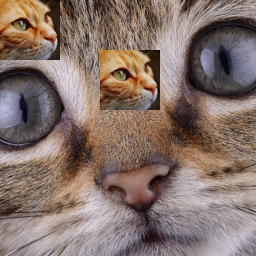

In [79]:

original_img


In [26]:

img_to_add = Image.open ( 'data/image-cats/cat2.png' )


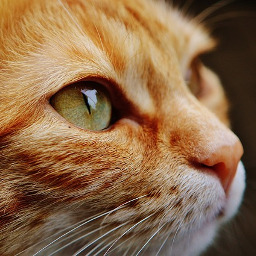

In [27]:
img_to_add

## resize image

In [28]:
img_to_add = img_to_add.resize ((60, 60))

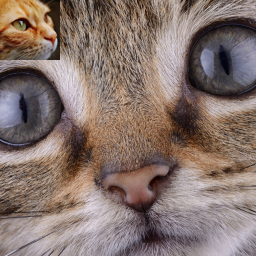

In [29]:
original_img.paste( img_to_add)
original_img

## specify position to paste

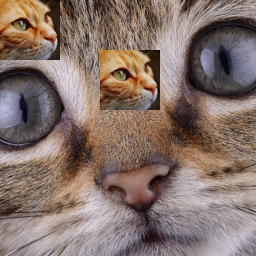

In [30]:
original_img.paste ( img_to_add, (100, 50))
original_img

In [31]:
original_img.save ('data/image-cats/mod_cat.png')


## img to Numpy to Img


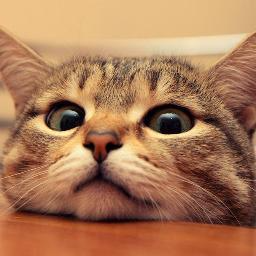

In [32]:
my_img = Image.open ('data/image-cats/cat3.png' )

my_img

In [90]:
img_np = np.array (my_img)
print (img_np.shape)

(256, 256, 3)


In [91]:
new_img_np = img_np[:, :, :-1] ## last channel removed ??? RGB - Blue is lost
print ( new_img_np.shape )

(256, 256, 2)


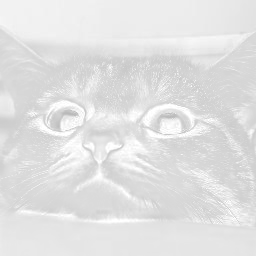

In [92]:
pil_image = Image.fromarray (new_img_np)
pil_image

## noise image

In [36]:
noise_img_array = np.random.randint (255, size = (400,400), dtype = np.uint8)

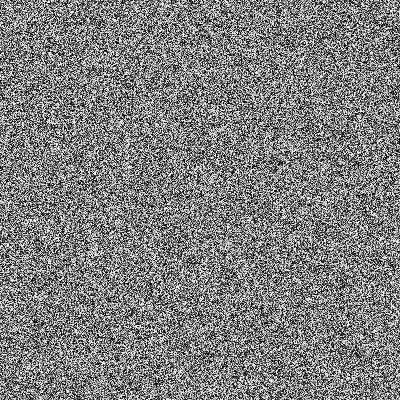

In [37]:
noise_image = Image.fromarray (noise_img_array)
noise_image

## read data from torchvision

In [38]:
## !pip install torchvision

In [39]:
import torchvision
from torchvision import datasets

In [40]:
data_path = 'data/cifar10data/'

cifar10 = datasets.CIFAR10 (data_path, train = True, download = True)

## 'download = True' will works first time, next time it is not.

Files already downloaded and verified


In [41]:
print (cifar10)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data/cifar10data/
    Split: Train


In [42]:
img, label = cifar10 [70]

In [43]:
print (label)

5


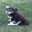

In [44]:
img

In [45]:
image_np = np.array (img)
print (image_np.shape)

(32, 32, 3)
